In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl

from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display="diagram")

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix,
    accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
)


<h2 style="color:green;">Business Understanding</h2>

<p>The Business goal is  to come up with the best machine learning classification model to predict if a future client will subscribe a term deposit or not based on several independent variables such as education level, marital status, if has housing loan or not, personal loan or not, etc. 

<h2 style="color:green;">Data Understanding</h2>

In [66]:
import pandas as pd
filename = '/Users/rajeshgoyal/Desktop/bank-full.csv'
df = pd.read_csv(filename)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h5>Investigate the dataset for missing or problematic data.</h5>

In [69]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [70]:
df.loc[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


<h2 style="color:green;">Data Preparation</h2>

<h3 style="color:green;">Basic Cleaning</h3>

In [71]:
df.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<h5>Feature "unknown" is contained in several diferent variables, therefore, it was renamed as shown below:</h5>

In [72]:
df['job'] = df['job'].replace({'unknown': 'job_unknown'})
df['education'] = df['education'].replace({'unknown': 'edu_unknown'})
df['poutcome'] = df['poutcome'].replace({'unknown': 'pout_unknown'})
df['contact'] = df['contact'].replace({'unknown': 'contact_unknown'})

In [73]:
df=df.drop(['day'], axis = 1)

In [74]:
df=df.query('pdays!=-1')

<h4 style='color:green;font-size:20px'>Visualization of Categorical Variables Present</h4>

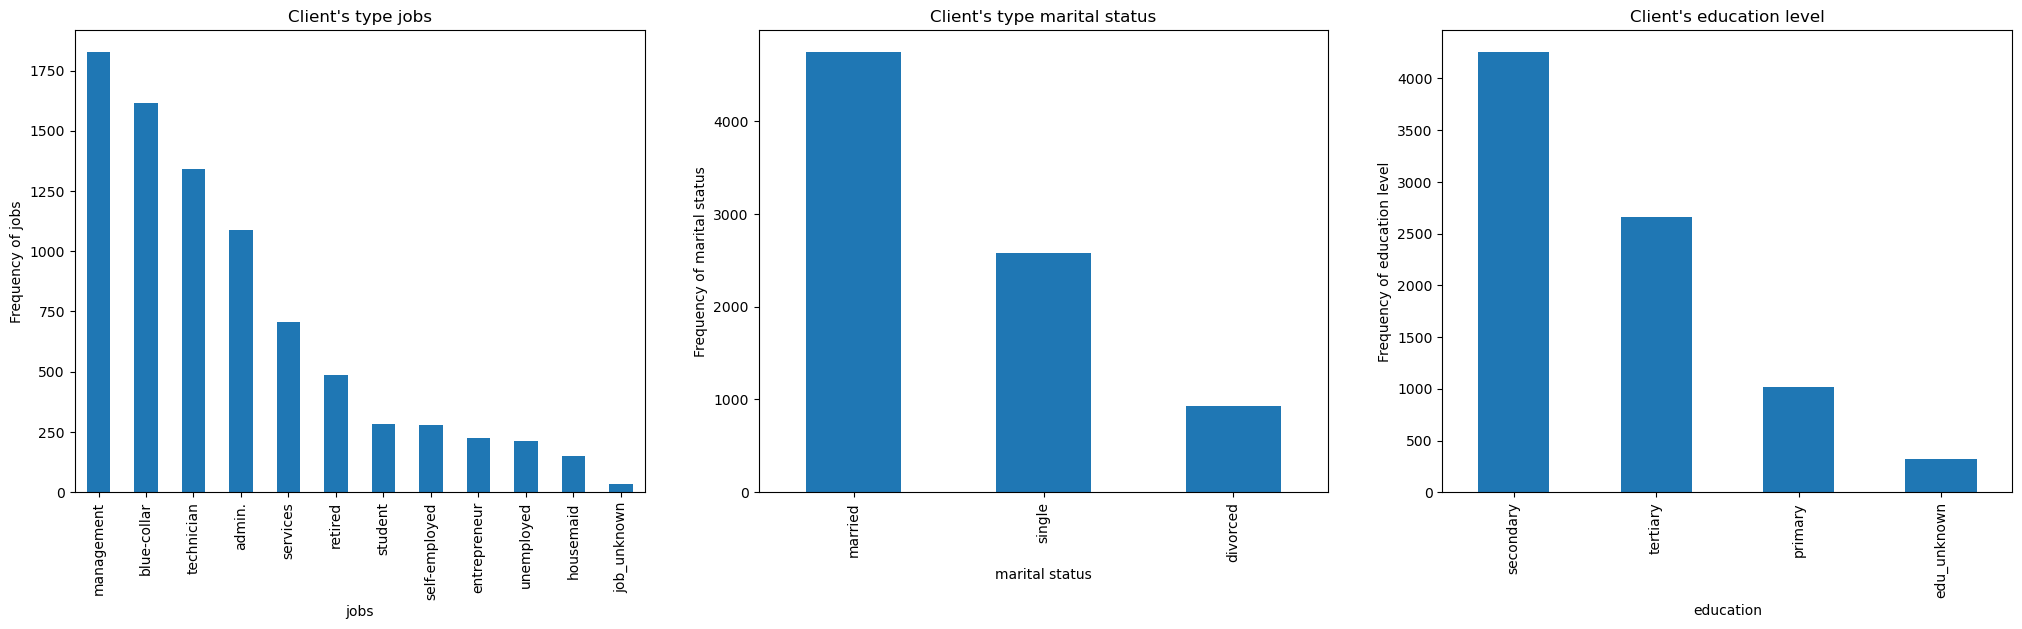

In [75]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.job.value_counts().plot(kind='bar')
plt.title("Client's type jobs")
plt1.set(xlabel = 'jobs', ylabel='Frequency of jobs')

plt.subplot(1,3,2)
plt1 = df.marital.value_counts().plot(kind='bar')
plt.title("Client's type marital status")
plt1.set(xlabel = 'marital status', ylabel='Frequency of marital status')

plt.subplot(1,3,3)
plt1 = df.education.value_counts().plot(kind='bar')
plt.title("Client's education level")
plt1.set(xlabel = 'education', ylabel='Frequency of education level')


plt.show()

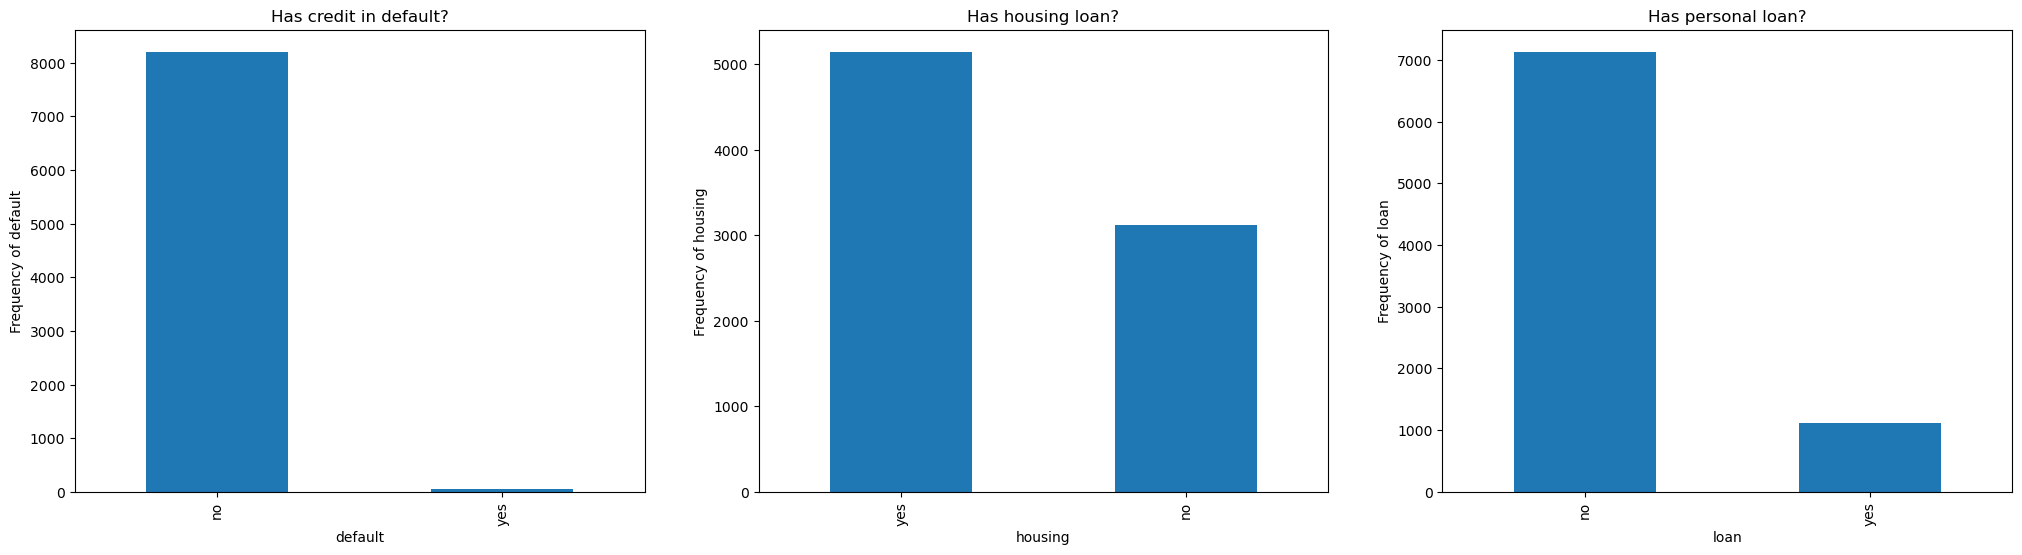

In [76]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.default.value_counts().plot(kind='bar')
plt.title("Has credit in default?")
plt1.set(xlabel = 'default', ylabel='Frequency of default')

plt.subplot(1,3,2)
plt1 = df.housing.value_counts().plot(kind='bar')
plt.title("Has housing loan?")
plt1.set(xlabel = 'housing', ylabel='Frequency of housing')

plt.subplot(1,3,3)
plt1 = df.loan.value_counts().plot(kind='bar')
plt.title("Has personal loan?")
plt1.set(xlabel = 'loan', ylabel='Frequency of loan')


plt.show()

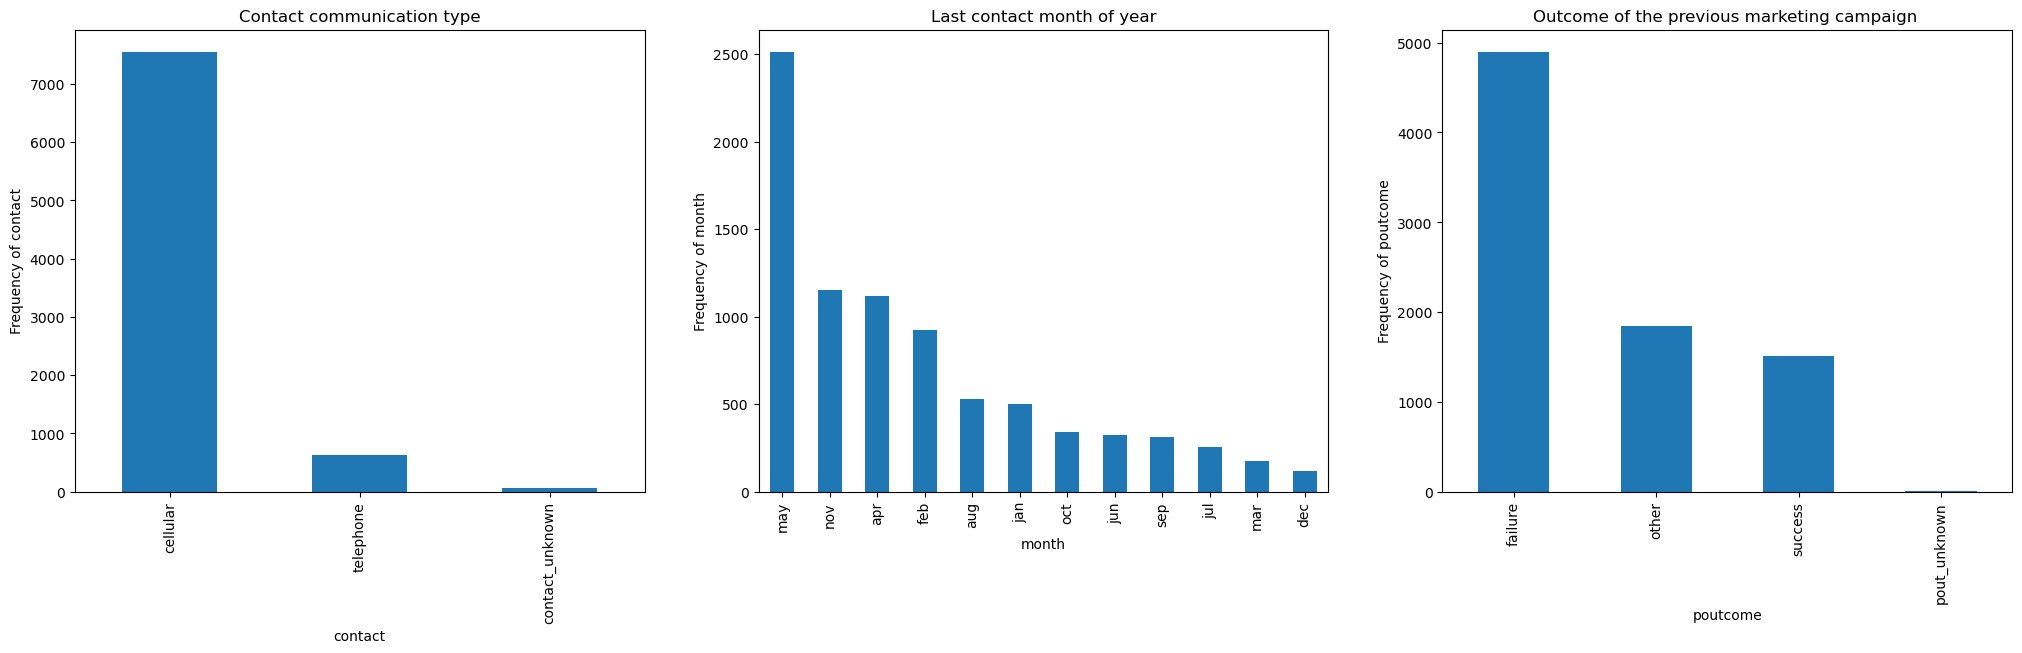

In [77]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.contact.value_counts().plot(kind='bar')
plt.title("Contact communication type")
plt1.set(xlabel = 'contact', ylabel='Frequency of contact')

plt.subplot(1,3,2)
plt1 = df.month.value_counts().plot(kind='bar')
plt.title("Last contact month of year")
plt1.set(xlabel = 'month', ylabel='Frequency of month')

plt.subplot(1,3,3)
plt1 = df.poutcome.value_counts().plot(kind='bar')
plt.title("Outcome of the previous marketing campaign ")
plt1.set(xlabel = 'poutcome', ylabel='Frequency of poutcome')


plt.show()

<h6 style='color:green;font-size:18px'>Treatment of Numerical Columns with Outliers: 'age','balance','duration','campaign','pdays'</h6>

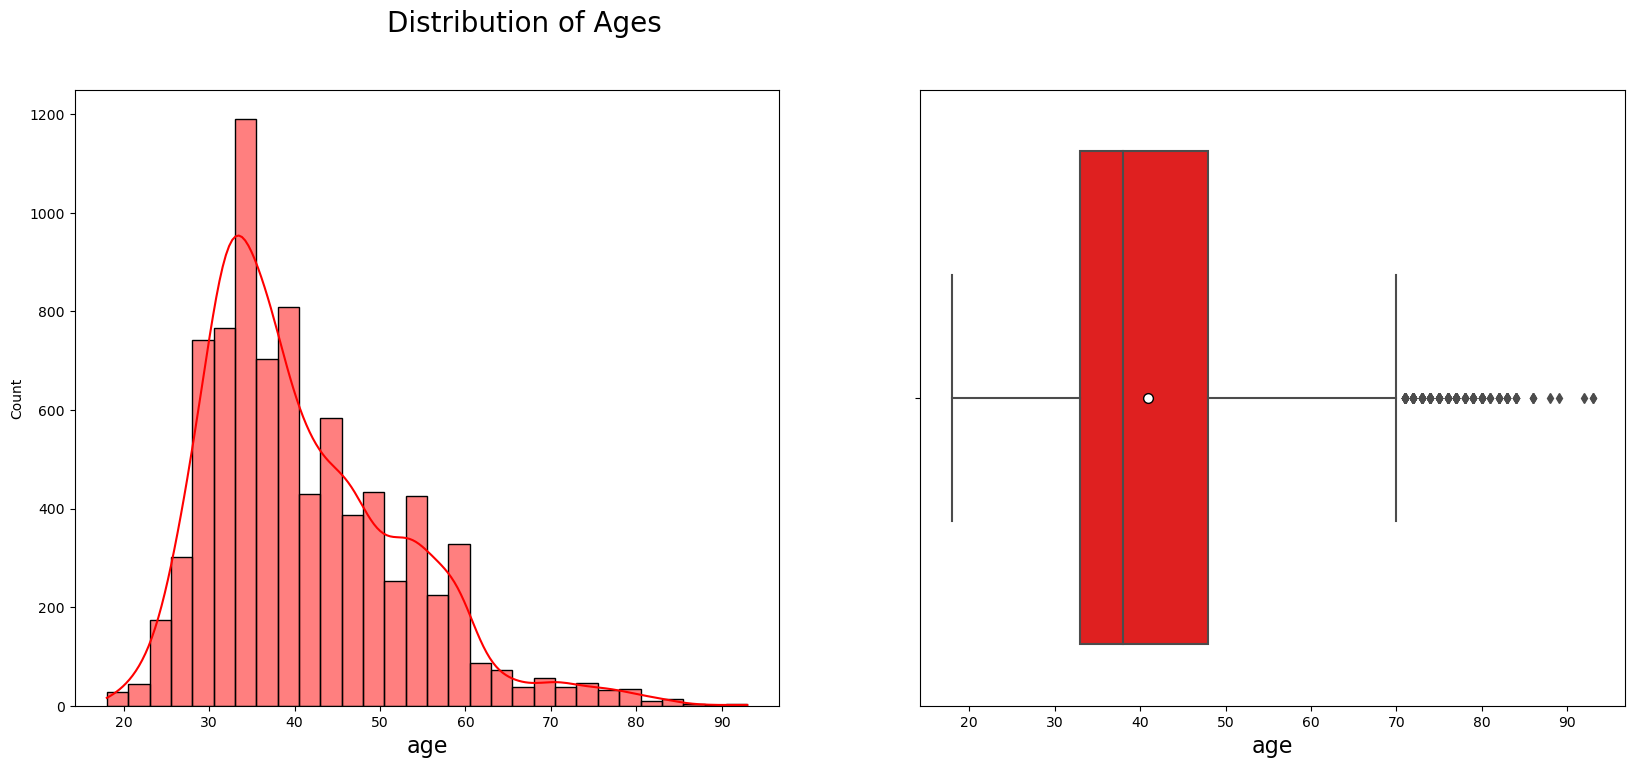

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="age",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('age',fontsize=16)
ax = sns.boxplot(x=df["age"],showmeans=True,meanprops={"marker":"o",
                      "markerfacecolor":"white", 
                      "markeredgecolor":"black",
                     "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('age',fontsize=16)
fig.suptitle('Distribution of Ages', fontsize=20,x=0.35 )
plt.show()

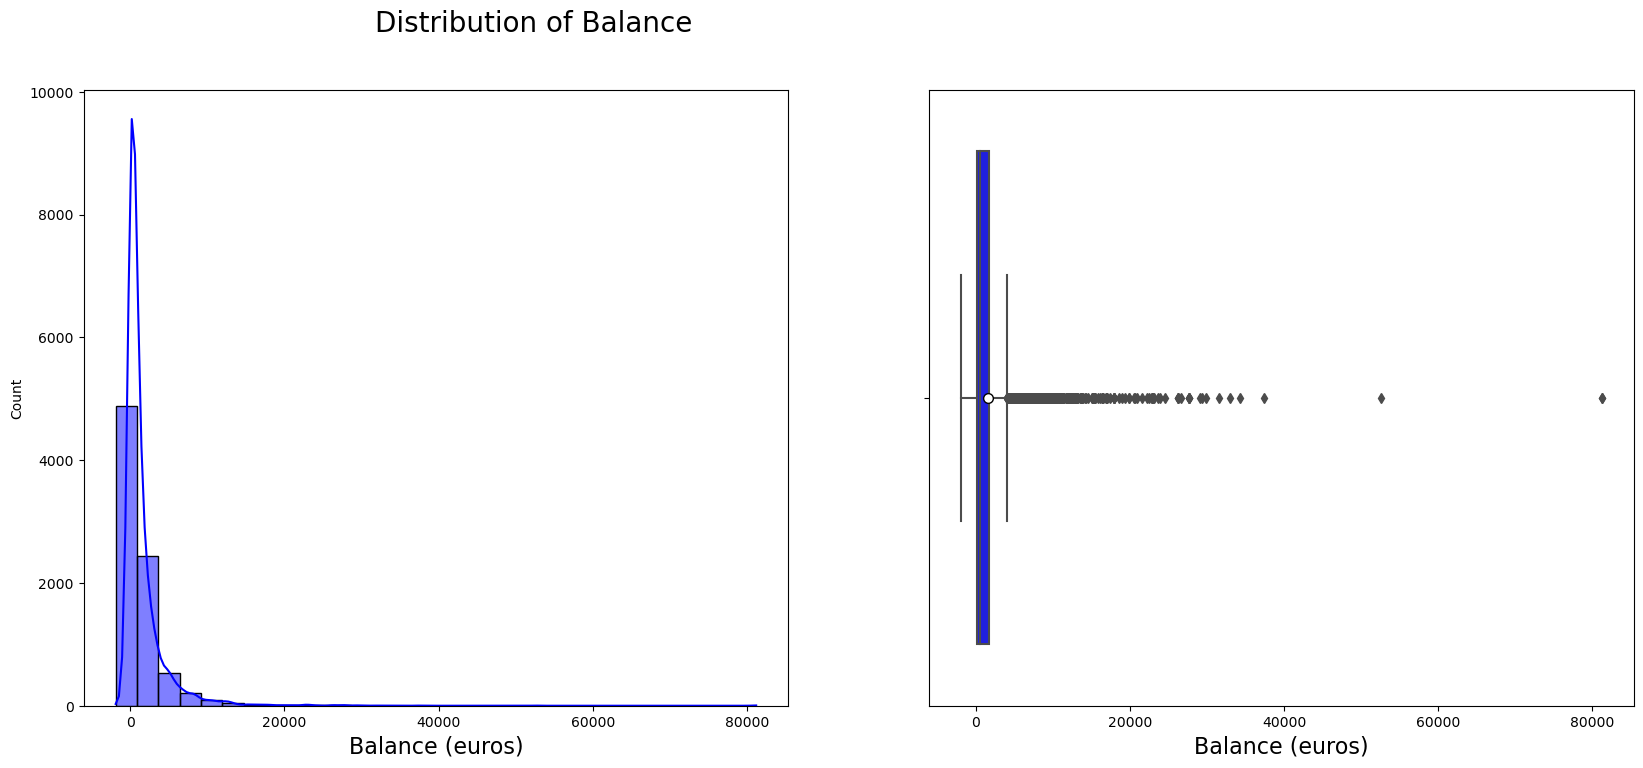

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="balance",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('Balance (euros)',fontsize=16)
ax = sns.boxplot(x=df["balance"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('Balance (euros)',fontsize=16)
fig.suptitle('Distribution of Balance', fontsize=20,x=0.35 )
plt.show()

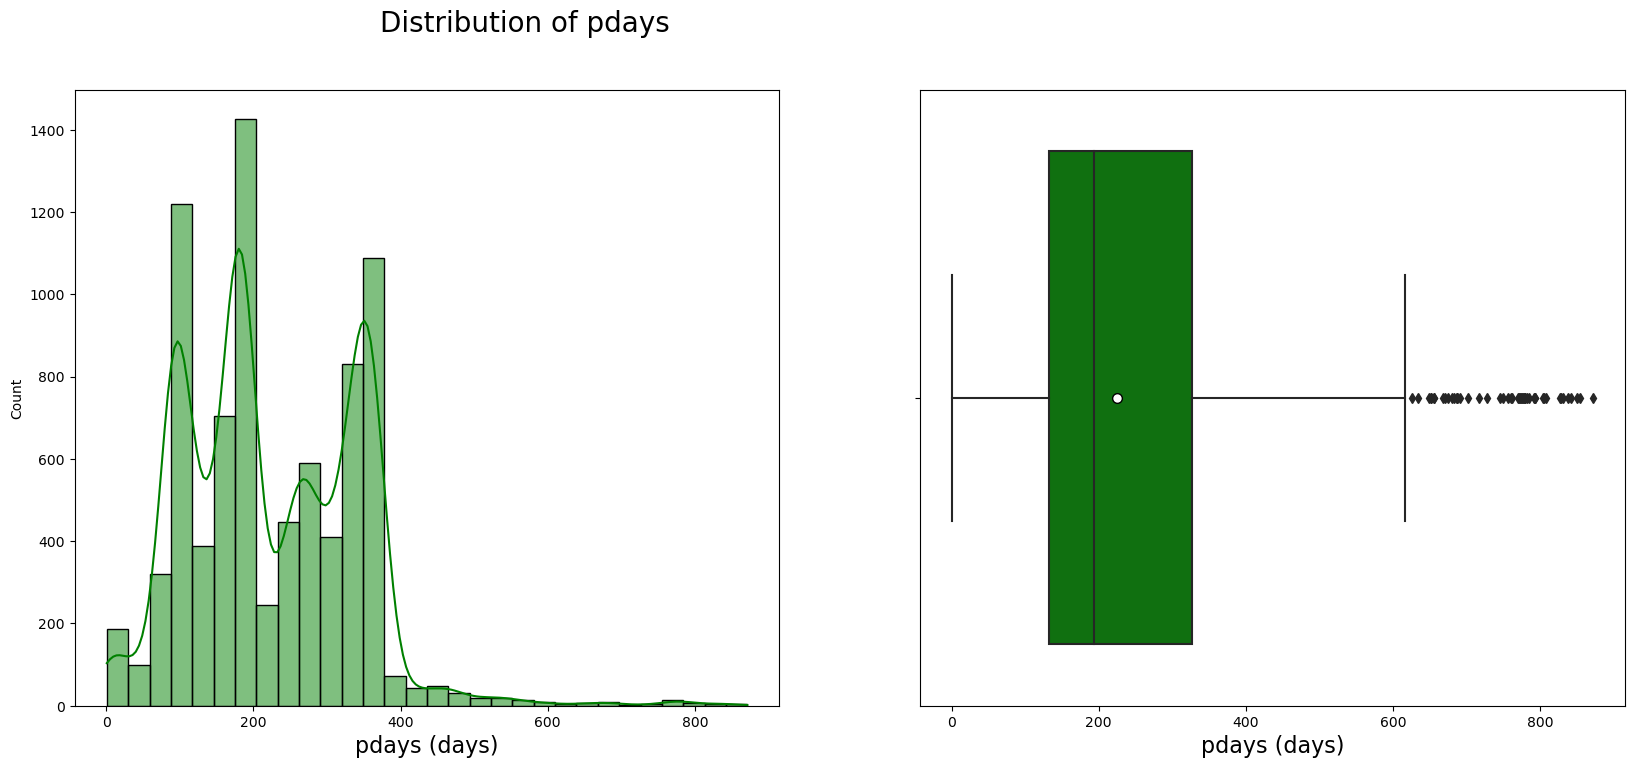

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="pdays",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('pdays (days)',fontsize=16)
ax = sns.boxplot(x=df["pdays"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('pdays (days)',fontsize=16)
fig.suptitle('Distribution of pdays', fontsize=20,x=0.35 )
plt.show()

<h6 style='color:blue;font-size:18px'>Inter quartile range (IQR) method</h6>

<p>One pass was applied to the aforementioned columns in order to remove the outliers. This pass consisted on applying the well known Inter quartile range (IQR) method.It was very effective, i.e., removing the majority of the outliers, and improving the metrics during the modelling phase. As an additional comments, the target column "balance" shows a distribution skewed to the left, i.e, it was felt there was no need  to use its logarithm during modelling phase.</p>

In [81]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [82]:
variables=['age','balance','pdays']

In [83]:
for variable in variables:
    df=outlierstreat(df,variable)    

10.5 70.5
0 3990.25
0 625.5


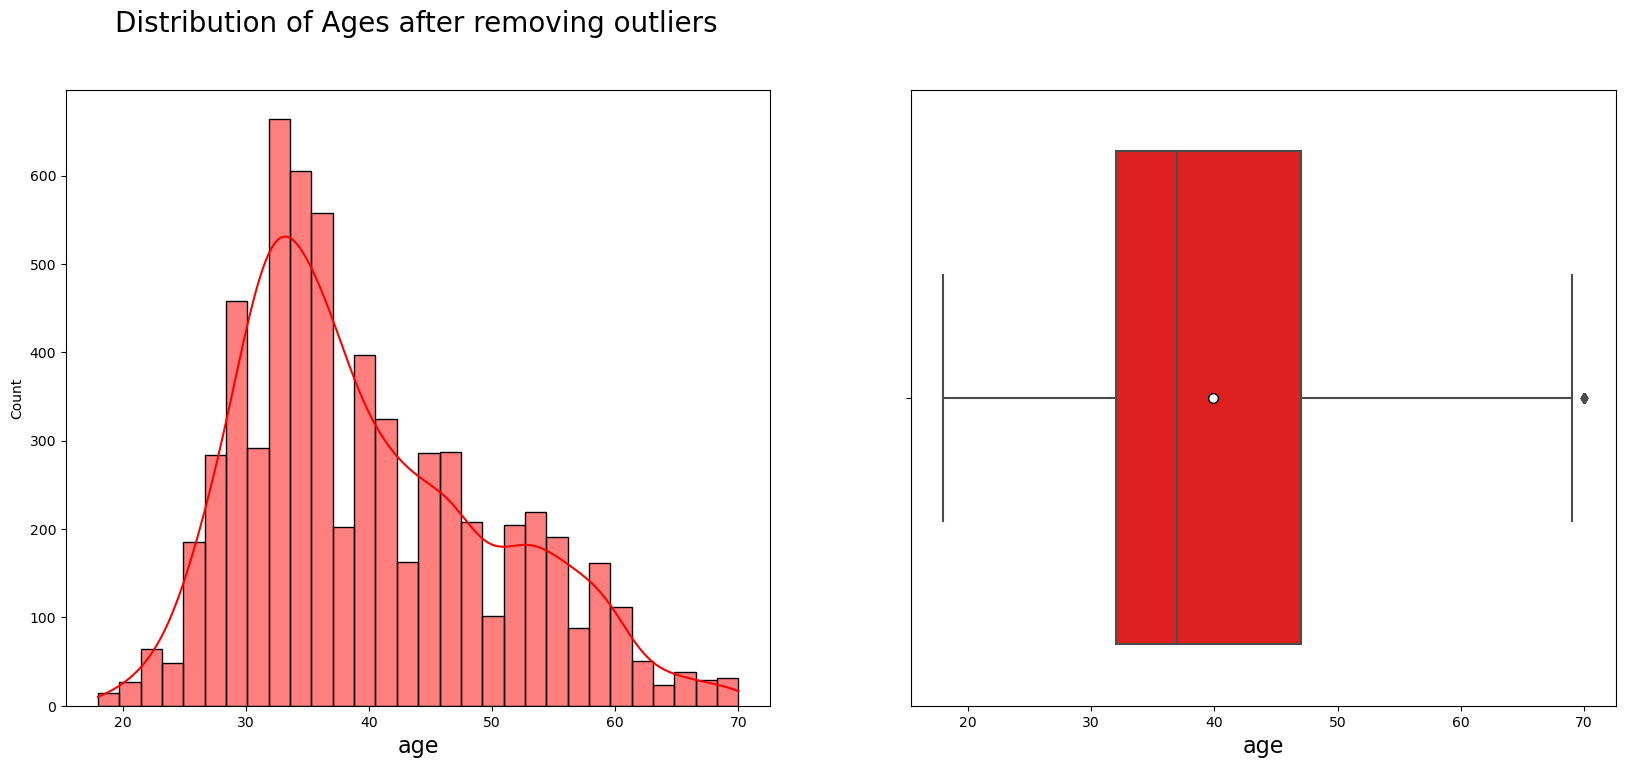

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="age",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('age',fontsize=16)
ax = sns.boxplot(x=df["age"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('age',fontsize=16)
fig.suptitle('Distribution of Ages after removing outliers', fontsize=20,x=0.30 )
plt.show()

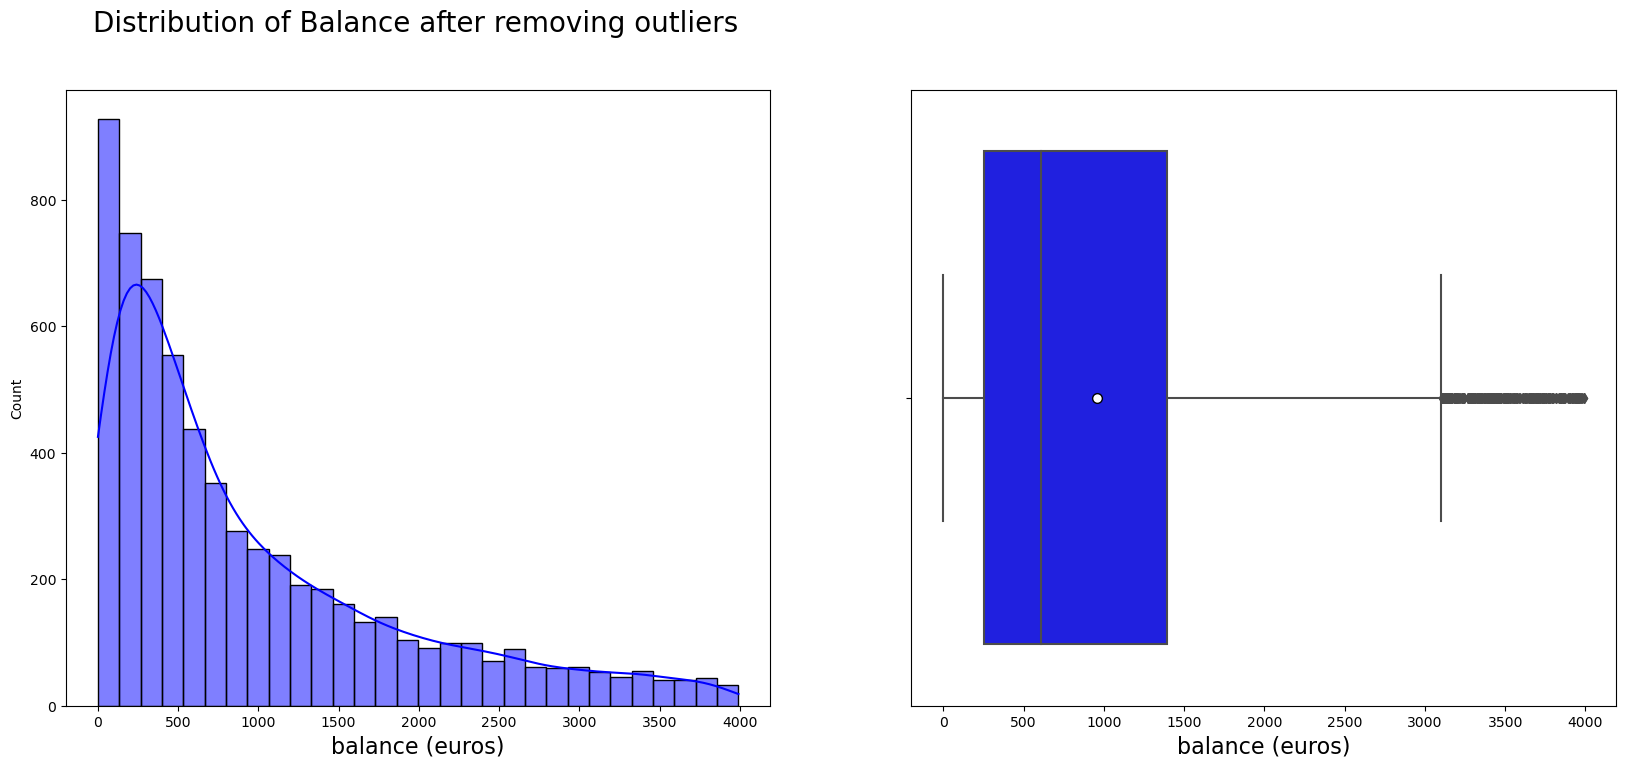

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="balance",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('balance (euros)',fontsize=16)
ax = sns.boxplot(x=df["balance"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('balance (euros)',fontsize=16)
fig.suptitle('Distribution of Balance after removing outliers', fontsize=20,x=0.30 )
plt.show()

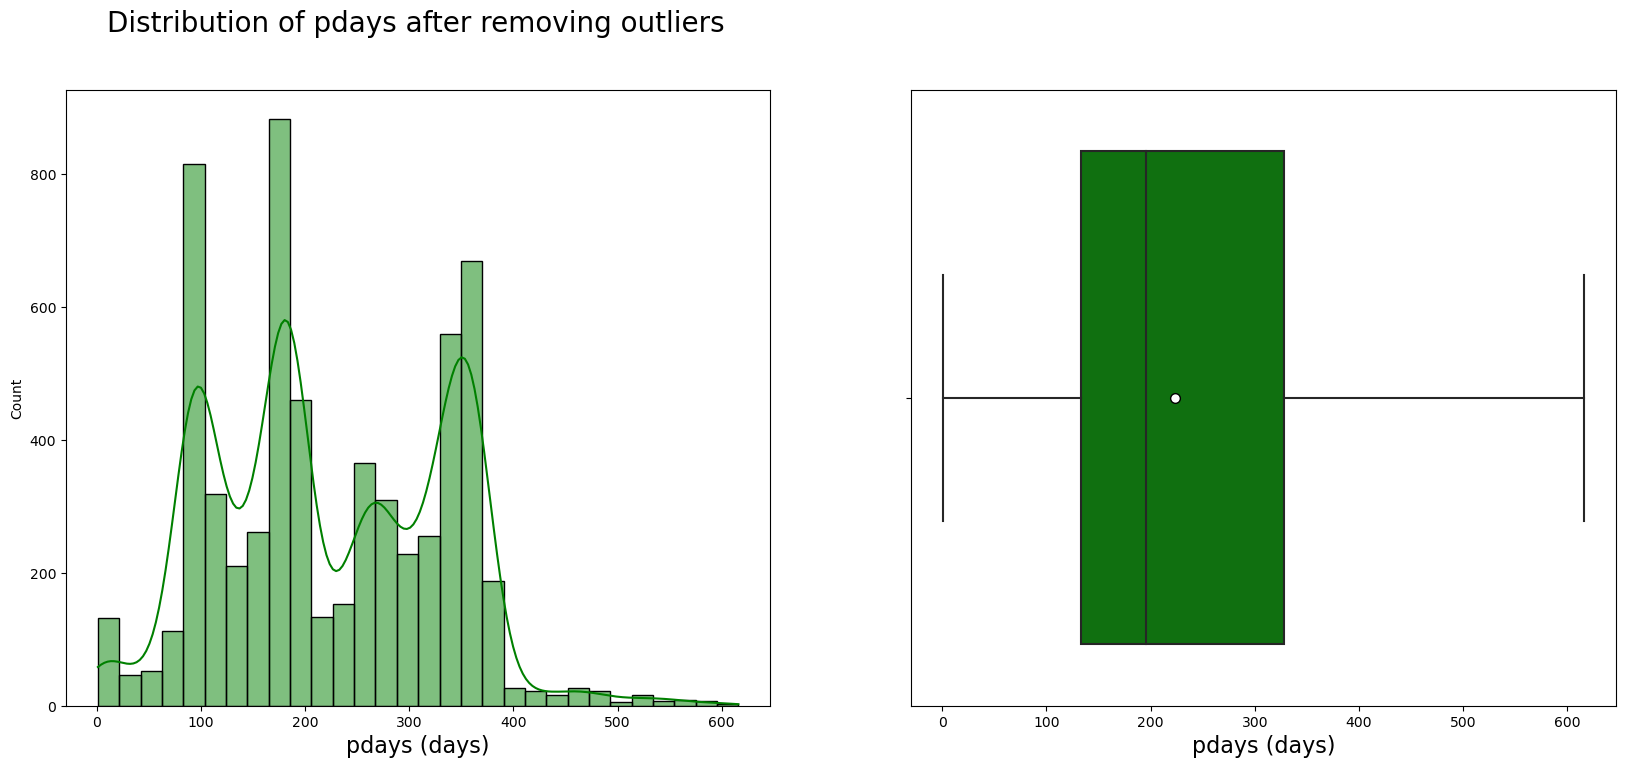

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="pdays",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('pdays (days)',fontsize=16)
ax = sns.boxplot(x=df["pdays"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('pdays (days)',fontsize=16)
fig.suptitle('Distribution of pdays after removing outliers', fontsize=20,x=0.30 )
plt.show()

<h6>Final Statistics after removing outliers for columns: "price","odometer", and "year".</h6>

In [23]:
print(df['age'].describe(),df['balance'].describe(),df['pdays'].describe())

count    6316.000000
mean       39.868746
std        10.269667
min        18.000000
25%        32.000000
50%        37.000000
75%        47.000000
max        70.000000
Name: age, dtype: float64 count    6316.000000
mean      955.575047
std       939.066620
min         1.000000
25%       252.000000
50%       608.500000
75%      1393.000000
max      3990.000000
Name: balance, dtype: float64 count    6316.000000
mean      223.408011
std       108.930300
min         1.000000
25%       133.000000
50%       196.000000
75%       328.000000
max       616.000000
Name: pdays, dtype: float64


<h5 style='color:blue;font-size:18px'>dependent variable: "y", representing has the client subscribed a term deposit? (binary: 'yes','no')</h5>

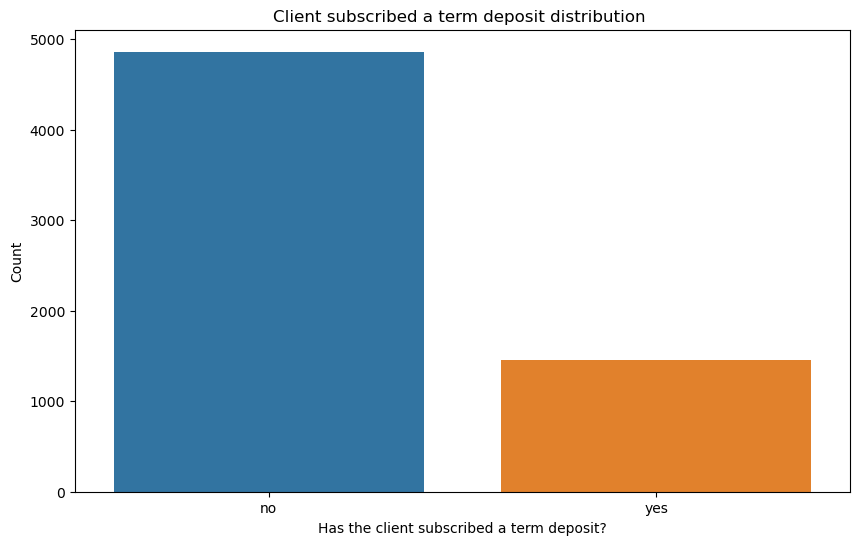

In [24]:
plt.figure(figsize=(10,6))
splot = sns.countplot(data=df, x = 'y')
splot.set_xticklabels(['no', 'yes'])
plt.xlabel('Has the client subscribed a term deposit?')
plt.ylabel('Count')
plt.title('Client subscribed a term deposit distribution ')
plt.show()

<h6 style='color:green;font-size:18px'>Analysis/Treatment of the Categorical Features</h6>

<h5 style="color:green;">Nominal Features:</h5><p>

<p>Nominal features are categorical features that have no numerical importance. Order does not matter. Most of the 
columns were found to fall in this category as follows: "job", "education","contact","month", 
    "marital",and "poutcome". The Pandas get_dummies function was used to creates dummy variables was used to treat 
    them. A dummy variable is a numerical variable that encodes categorical information, having two possible values:
        0 or 1.</p>

In [25]:
print(df['job'].value_counts(),df['education'].value_counts(),df['contact'].value_counts(),
      df['month'].value_counts(),df['marital'].value_counts(),df['poutcome'].value_counts())

job
management       1361
blue-collar      1268
technician       1038
admin.            876
services          546
retired           266
student           244
self-employed     224
entrepreneur      192
unemployed        165
housemaid         110
job_unknown        26
Name: count, dtype: int64 education
secondary      3329
tertiary       2011
primary         735
edu_unknown     241
Name: count, dtype: int64 contact
cellular           5843
telephone           431
contact_unknown      42
Name: count, dtype: int64 month
may    1902
apr     896
nov     839
feb     734
aug     418
jan     398
jun     256
oct     244
sep     220
jul     185
mar     132
dec      92
Name: count, dtype: int64 marital
married     3544
single      2103
divorced     669
Name: count, dtype: int64 poutcome
failure         3724
other           1400
success         1187
pout_unknown       5
Name: count, dtype: int64


In [26]:
job_encoded=pd.get_dummies(df['job'])
education_encoded=pd.get_dummies(df['education'])
contact_encoded=pd.get_dummies(df['contact'])
month_encoded=pd.get_dummies(df['month'])
marital_encoded=pd.get_dummies(df['marital'])
poutcome_encoded=pd.get_dummies(df['poutcome'])
df1=pd.concat([df,job_encoded,education_encoded,contact_encoded,month_encoded,marital_encoded,
               poutcome_encoded],axis=1)

<h6 style="color:red;">Binary data:</h6><p>

<p>Binary data is also nominal data, meaning they represent qualitatively different values that cannot be compared 
numerically.There were three independent variables considered as binary: 'default'
        'housing', ;'loan' all of them with 'yes' and 'no'</p>

In [27]:
ohe_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['default','housing','loan']),
                                          remainder='passthrough')

<h5 style="color:red;">Ordinal Features:</h5><p>
None of the independent variables were considered to be treated as a ordinal
    feature, not even poutcome, since there were a bunch of 'unknown' and 'other' items listed, beside 'failure' and 
    'success'</p>

<h5>Since, most of the columns have values (0 or 1), it was decided to scale the column: "balance"as follow:</h5>

In [28]:
df1['balance']=df1['balance'].div(100)

<h6 style='color:blue;font-size:18px'>Splitting the variables</h6>

In [29]:
X=df1.drop(['job','education','duration','contact','month','marital','poutcome','y'], axis = 1)
y = df1['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state = 42,stratify = y)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 24060 to 45210
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              6316 non-null   int64  
 1   default          6316 non-null   object 
 2   balance          6316 non-null   float64
 3   housing          6316 non-null   object 
 4   loan             6316 non-null   object 
 5   campaign         6316 non-null   int64  
 6   pdays            6316 non-null   int64  
 7   previous         6316 non-null   int64  
 8   admin.           6316 non-null   bool   
 9   blue-collar      6316 non-null   bool   
 10  entrepreneur     6316 non-null   bool   
 11  housemaid        6316 non-null   bool   
 12  job_unknown      6316 non-null   bool   
 13  management       6316 non-null   bool   
 14  retired          6316 non-null   bool   
 15  self-employed    6316 non-null   bool   
 16  services         6316 non-null   bool   
 17  student       

<h5> Histogram of the independent variables</h5>

<h4 style='color:green;font-size:18px'>Creation of Models</h4>
<p>Although, working with imbalance data is always a challenge for any particular Machine Learning Model, four models
were considered for the analysis: KNN, Logistic Regression, Support Machine Vector, and Decision Tree. 
The metric used to estimate the optimum parameters for each model was 'roc_auc', since it works quite well for 
imbalance data</p>

<h6 style='color:blue;font-size:18px'>KNeighborsClassifier</h6>

In [32]:
pipeline_knn=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline_knn

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

<h6>Hyperparameters being tested</h6>

In [33]:
param2_knn={'knn__n_neighbors':np.array(range(1,21,2)),'knn__weights' : ['uniform', 'distance'],'knn__p':[1,2]}

In [34]:
precision_preds_grid_knn=GridSearchCV(pipeline_knn, param_grid=param2_knn,scoring='roc_auc',cv = 5)
precision_preds_grid_knn.fit(X_train,y_train)



best_score_test_knn=precision_preds_grid_knn.score(X_test,y_test)
best_score_train_knn=precision_preds_grid_knn.score(X_train,y_train)
best_params_precision_preds_knn=precision_preds_grid_knn.best_params_


print(f'roc_auc train: {best_score_train_knn: .3f}',f'roc_auc test: {best_score_test_knn: .3f}')
print("Tuned Hyperparameters KNearestNeighborsClassifier:", best_params_precision_preds_knn)

n_splits_knn  = precision_preds_grid_knn.n_splits_ 
n_iter_knn = pd.DataFrame(precision_preds_grid_knn.cv_results_).shape[0]
mean_time_knn=np.mean(precision_preds_grid_knn.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_knn * n_splits_knn * n_iter_knn: .3f}')

roc_auc train:  1.000 roc_auc test:  0.834
Tuned Hyperparameters KNearestNeighborsClassifier: {'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'distance'}
Elapsed Time using GridSearchCV:  4.779


<h6 style='color:blue;font-size:18px'>Logistic Regression</h6>

In [35]:
pipeline_lgr=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), 
                       ('log', LogisticRegression(random_state=42, class_weight='balanced'))])
pipeline_lgr

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=42))])

<h6>Hyperparameters being tested</h6>

In [36]:
param2_lgr = {'log__penalty' : ['l1','l2'],'log__C': np.logspace(-3,3,7),
              'log__solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [37]:
pipeline_lgr=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), ('log', LogisticRegression(random_state=42, class_weight='balanced'))])
precision_preds_grid_lgr=GridSearchCV(pipeline_lgr, param_grid=param2_lgr,scoring='roc_auc',cv = 5)
precision_preds_grid_lgr.fit(X_train,y_train)


best_score_test_lgr=precision_preds_grid_lgr.score(X_test,y_test)
best_score_train_lgr=precision_preds_grid_lgr.score(X_train,y_train)
best_params_precision_preds_lgr=precision_preds_grid_lgr.best_params_

print(f'roc_auc train: {best_score_train_lgr: .3f}',f'roc_auc test: {best_score_test_lgr: .3f}')
print("Tuned Hyperparameters Logistic Regression :", best_params_precision_preds_lgr)

n_splits_lgr  = precision_preds_grid_lgr.n_splits_ 
n_iter_lgr = pd.DataFrame(precision_preds_grid_lgr.cv_results_).shape[0]
mean_time_lgr=np.mean(precision_preds_grid_lgr.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_lgr* n_splits_lgr * n_iter_lgr: .3f}')

roc_auc train:  0.841 roc_auc test:  0.853
Tuned Hyperparameters Logistic Regression : {'log__C': 0.1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
Elapsed Time using GridSearchCV:  10.242


<h6 style='color:blue;font-size:18px'>Support Vector Machine</h6>

In [38]:
pipeline_svc=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),
                             ('svc', SVC(probability=True))])
pipeline_svc

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('svc', SVC(probability=True))])

<h6>Hyperparameters being tested</h6>

In [39]:
param2_svc = {'svc__kernel': ['rbf', 'poly', 'linear','sigmoid'],'svc__gamma': [0.001,0.1, 1.0,10]}

In [40]:
pipeline_svc=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),('svc', SVC(probability=True))])
precision_preds_grid_svc=GridSearchCV(pipeline_svc, param_grid=param2_svc,scoring='roc_auc',cv=5)
precision_preds_grid_svc.fit(X_train,y_train)


best_score_test_svc=precision_preds_grid_svc.score(X_test,y_test)
best_score_train_svc=precision_preds_grid_svc.score(X_train,y_train)
best_params_precision_preds_svc=precision_preds_grid_svc.best_params_

print(f'roc_auc train: {best_score_train_svc: .3f}',f'roc_auc test: {best_score_test_svc: .3f}')
print("Tuned Hyperparameters SVC :", best_params_precision_preds_svc)

n_splits_svc  = precision_preds_grid_svc.n_splits_ 
n_iter_svc = pd.DataFrame(precision_preds_grid_svc.cv_results_).shape[0]
mean_time_svc=np.mean(precision_preds_grid_svc.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_svc * n_splits_svc * n_iter_svc: .3f}')

roc_auc train:  0.842 roc_auc test:  0.826
Tuned Hyperparameters SVC : {'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Elapsed Time using GridSearchCV:  182.629


<h6 style='color:blue;font-size:18px'>Decision Tree</h6>

In [41]:
pipeline_tree=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),
                              ('tree', DecisionTreeClassifier(random_state=42))])
pipeline_tree

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

<h6>Hyperparameters being tested</h6>

In [42]:
param2_tree = {'tree__max_depth': [i for i in range(1, 10)],'tree__min_samples_split': [0.01,0.05,0.1, 0.2, 0.25],
               'tree__criterion': ['gini', 'entropy','log_loss'],'tree__min_samples_leaf': [i for i in range(1, 6)]}

In [43]:
tree_grid = GridSearchCV(pipeline_tree, param_grid=param2_tree,scoring='roc_auc',cv=5)
tree_grid.fit(X_train, y_train)


best_score_test_tree=tree_grid.score(X_test,y_test)
best_score_train_tree=tree_grid.score(X_train,y_train)
best_params_precision_preds_tree=tree_grid.best_params_

print(f'roc_auc train: {best_score_train_svc: .3f}',f'roc_auc test: {best_score_test_svc: .3f}')
print("Tuned Hyperparameters Decision Tree :", best_params_precision_preds_tree)

n_splits_tree  = tree_grid.n_splits_ 
n_iter_tree = pd.DataFrame(tree_grid.cv_results_).shape[0]
mean_time_tree=np.mean(tree_grid.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_tree * n_splits_tree * n_iter_tree: .3f}')

roc_auc train:  0.842 roc_auc test:  0.826
Tuned Hyperparameters Decision Tree : {'tree__criterion': 'entropy', 'tree__max_depth': 8, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 0.1}
Elapsed Time using GridSearchCV:  91.918


<h3 style="color:green;">Evaluation</h3>

<h4>Regression Models ranking built by comparing their metrics</h4>

In [44]:
namedIndex = pd.Series(['KNN','Logistic Regression','SVC','Decision Tree'], name='Model')

df_results = pd.DataFrame({'train_score': [best_score_train_knn,best_score_train_lgr,best_score_train_svc,best_score_train_tree],
        'test_score': [best_score_test_knn,best_score_test_lgr,best_score_test_svc,best_score_test_tree], 
        'average fit time':[mean_time_knn*n_splits_knn * n_iter_knn,mean_time_lgr*n_splits_lgr * n_iter_lgr,mean_time_svc*n_splits_svc * n_iter_svc,mean_time_tree * n_splits_tree * n_iter_tree]},
        index=namedIndex)

df_results.head()

,train_score,test_score,average fit time
Model,,,
KNN,1.000000,0.834436,4.779287
Logistic Regression,0.841082,0.853491,10.241659
SVC,0.842114,0.826091,182.628820
Decision Tree,0.829581,0.824912,91.917527


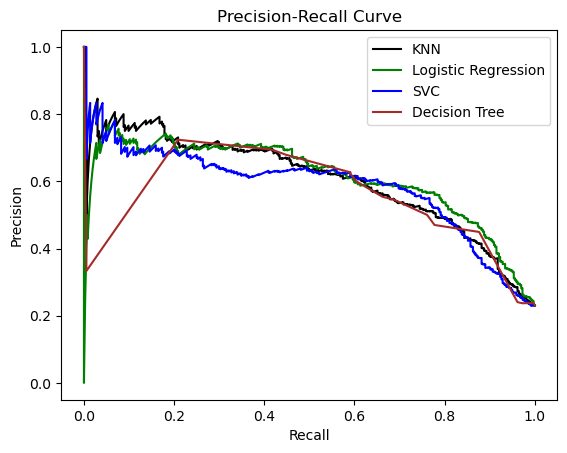

In [49]:
y_score_knn = precision_preds_grid_knn.predict_proba(X_test)[:, 1]
y_score_lgr = precision_preds_grid_lgr.predict_proba(X_test)[:, 1]
y_score_svc = precision_preds_grid_svc.predict_proba(X_test)[:, 1]
y_score_tree = tree_grid.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_score_knn,pos_label="yes")
precision_lgr, recall_lgr, thresholds_lgr = precision_recall_curve(y_test, y_score_lgr,pos_label="yes")
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, y_score_svc,pos_label="yes")
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_score_tree,pos_label="yes")
fig, ax = plt.subplots()
ax.plot(recall_knn, precision_knn, color='black',label='KNN')
ax.plot(recall_lgr, precision_lgr, color='green',label='Logistic Regression')
ax.plot(recall_svc, precision_svc, color='blue',label='SVC')
ax.plot(recall_tree, precision_tree, color='brown',label='Decision Tree')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='best')

#display plot
plt.show()